# Prison Helicopter Escape Analysis

Table of Contents:
1. Introduction
2. Data Extraction
3. Data Cleaning
4. Data Analysis
5. Conclusion

## Introduction:
    
There have been multiple prison escapes where an inmate escapes by means of a helicopter. In this project, we're going to work with data from [helicopter prison escapes!](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes#Actual_attempts) which includes prisoner escapes where a helicopter was used in an attempt to free prisoners from a place of internment, a prison or correctional facility

The `aim` of this project is to answer the following questions:

- In which year did the most helicopter prison break attempts occur?
- In which countries do the most attempted helicopter prison escapes occur?
- In which countries do helicopter prison breaks have a higher chance of success?
- Which escapees have done it more than once?
- Which month recorded high number of break attempts?

## Data Extraction

We begin by importing some helper functions.

In [221]:
# To import the functions from the enclosed helper.py file
from helper import *

# Now let's get the data we need into Python. We will be getting our data straight from the Wikipedia article
# we will create a variable with the Wikipedia's article url and pass that variable to the helper function data_from_url()
url = 'https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes'
data_org = data_from_url(url)

In [222]:
# Let's print the first three rows
for row in data_org[:3]:
    print(row)

['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro', "Joel David Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough of Mexico City. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on August 19, 1971, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Carlos Antonio Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[9] Both men were flown to Texas and then different planes flew Kaplan to California and Contreras to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[9] The escape is told in a book, The 10-Second Jailbreak: The Helicopter Escape of Joel David Kaplan.[4] It also inspired t

We have six columns which are {Date,Prison name,Country,Succeeded,Escapees,Details}.

## Data Cleaning
Most of the space on the screen is taken by the last element, the "Details" column. Since the questions to solve does not need this column, we're going to modify data variable so that the last element of each row (the Details) isn't present anymore.

In [223]:
index = 0
data = data_org[:]
for row in data:
    data[index] = row[:-1] # New list "data" without touching the original list
    index += 1
    
# printing first 4 rows to check if the "details" column is not present anymore
print(data[:4])

[['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], ['October 31, 1973', 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus Twomey Kevin Mallon"], ['May 24, 1978', 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock Trapnell Martin Joseph McNally James Kenneth Johnson'], ['February 27, 1981', 'Fleury-Mérogis, Essonne, Ile de France', 'France', 'Yes', 'Gérard Dupré Daniel Beaumont']]


The dates in the dataset are in the format 'August 19, 1971'. We'll modify the date column to only include the year information. To achieve this, we'll utilize the helper function fetch_year(). 

fetch_year() function takes a date string as input and extracts the year, which can be useful for our task of converting the dates in the dataset to include only the year.

In [202]:
for row in data:
    row[0] = fetch_year(row[0])
print(data[:2]) # for checking purposes

[[1971, 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], [1973, 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus Twomey Kevin Mallon"]]


## Data Analysis

### In which year did the most helicopter prison break attempts occur?

We're going to create a list of lists, where each inner list contains two elements:

- A year
- The number of attempts that occurred in that corresponding year

In [203]:
#finding out the earliest and latest years in the data
min_year = min(data, key=lambda x: x[0])[0]
max_year = max(data, key=lambda x: x[0])[0]
print(min_year,"-",max_year) #1971 - 2020

1971 - 2020


In [204]:
# creating a list of distinct years between min and max year found out in the previous cell
years = []
for year in range(min_year, max_year + 1):
    years.append(year)
print(years)

[1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [205]:
#generating a list of all the years between min_year and max_year (inclusive) and a default value of 0
#i.e., a list with attempts_per_year, whose elements all look like [<year>, 0]
attempts_per_year = []
for row in years:
    attempts_per_year.append([row, 0])
    
print(attempts_per_year[:5]) #for checking purposes

[[1971, 0], [1972, 0], [1973, 0], [1974, 0], [1975, 0]]


In [206]:
# We can now determine how many attempts there were in each year
for row in data:
    for year_attempt in attempts_per_year:
        year = year_attempt[0]
        if row[0] == year:
            year_attempt[1] += 1
print(attempts_per_year[:5])

[[1971, 1], [1972, 0], [1973, 1], [1974, 0], [1975, 0]]


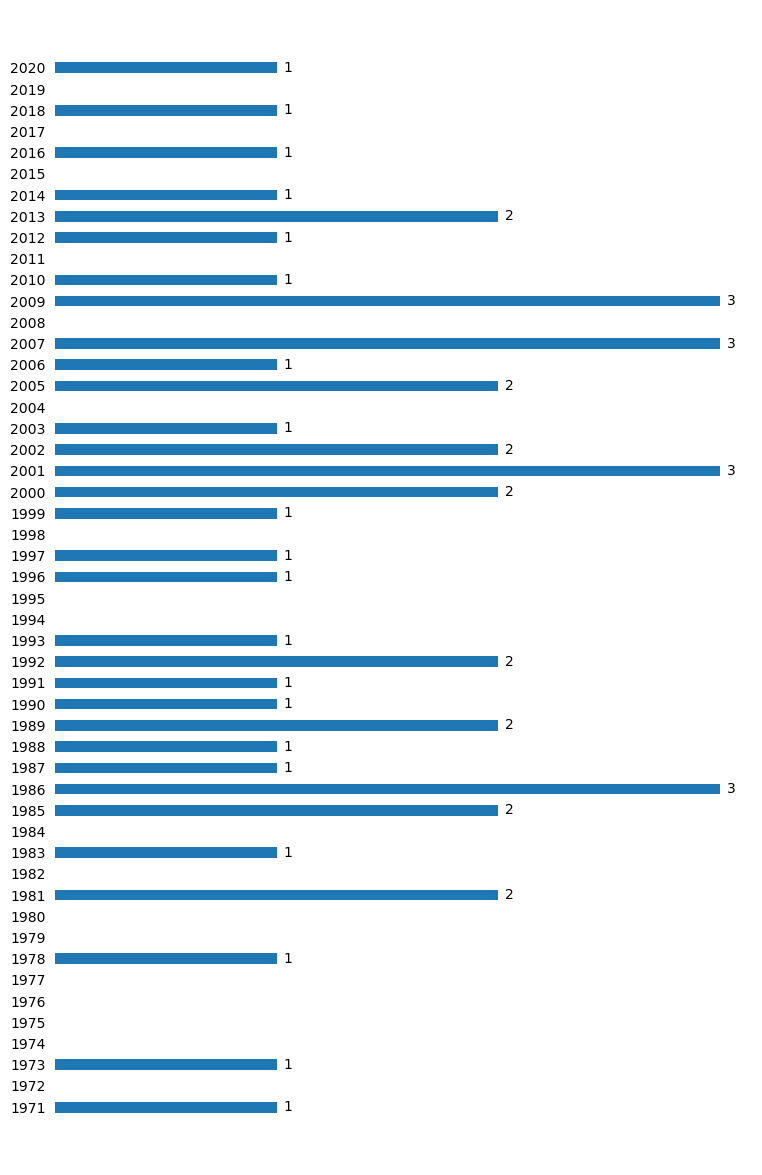

In [207]:
%matplotlib inline
barplot(attempts_per_year)

From the above chart, it is clear that in 1986,2001,2007 & 2009 most prison escapes have happened.

### In which countries do the most attempted helicopter prison escapes occur?

Instead of using the lists,we're going to use panda Dataframes which is easier to code.

In [208]:
import pandas as pd
#df = pd.read_html(url)[1]
#df = df[["Date", "Prison name", "Country", "Succeeded", "Escapee(s)"]]
df_prison = pd.DataFrame(data,columns = ["Date", "Prison name", "Country", "Succeeded", "Escapee(s)"])
countries_frequency = df_prison["Country"].value_counts()
print(countries_frequency)

France            15
United States      8
Canada             4
Greece             4
Belgium            4
Australia          2
Brazil             2
United Kingdom     2
Mexico             1
Ireland            1
Italy              1
Puerto Rico        1
Chile              1
Netherlands        1
Russia             1
Name: Country, dtype: int64


France has the most prison escapes of 15 attempts followed by United States and Canada.

<Axes: title={'center': 'Prison Break Attempts per Country'}, ylabel='#ofAttempts'>

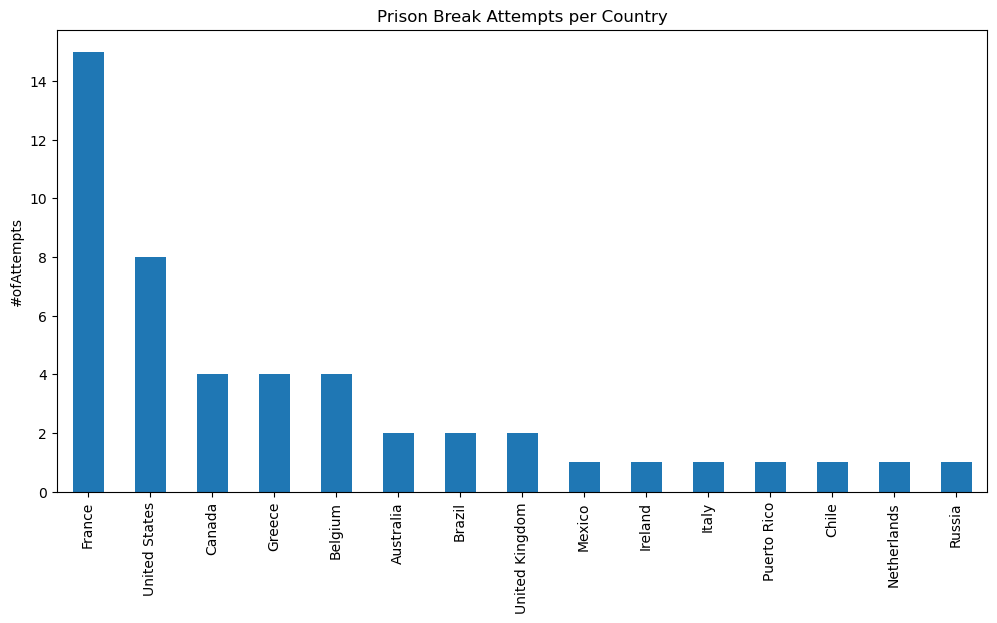

In [209]:
import matplotlib.pyplot as plt

countries_frequency.reset_index()
countries_frequency.plot(kind='bar' , x = 'Country',y = 'No. of Attempts',title = 'Prison Break Attempts per Country',figsize = (12,6),ylabel="#ofAttempts")

### In which countries do helicopter prison breaks have a higher chance of success?

In [210]:
df_success = df_prison.loc[df["Succeeded"] == "Yes"]
print(df_success["Country"].value_counts())

France            11
United States      6
Canada             3
Brazil             2
Greece             2
Belgium            2
Mexico             1
Ireland            1
Italy              1
United Kingdom     1
Puerto Rico        1
Chile              1
Australia          1
Russia             1
Name: Country, dtype: int64


To aid in better understanding, lets create a new dataframe with country,attempts and success.

In [211]:
df_attemp_success = pd.concat([countries_frequency,df_success["Country"].value_counts()],join="inner",axis=1)
df_attemp_success.columns = ['Attempts', 'Success']
df_attemp_success["Success Rate"] = (df_attemp_success["Success"] * 1.0 / df_attemp_success["Attempts"]) * 100
print(df_attemp_success)

                Attempts  Success  Success Rate
France                15       11     73.333333
United States          8        6     75.000000
Canada                 4        3     75.000000
Greece                 4        2     50.000000
Belgium                4        2     50.000000
Australia              2        1     50.000000
Brazil                 2        2    100.000000
United Kingdom         2        1     50.000000
Mexico                 1        1    100.000000
Ireland                1        1    100.000000
Italy                  1        1    100.000000
Puerto Rico            1        1    100.000000
Chile                  1        1    100.000000
Russia                 1        1    100.000000


<Axes: >

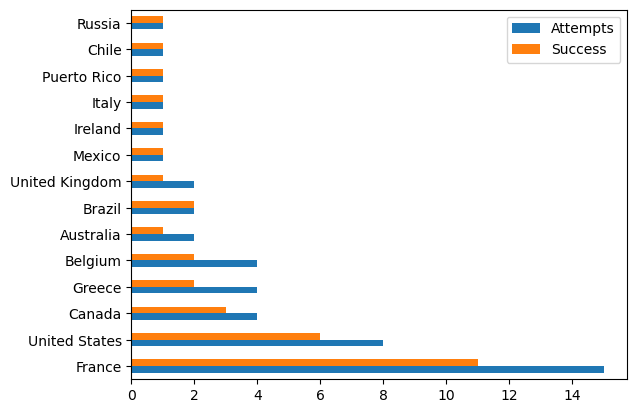

In [212]:
df_attemp_success.reset_index()
df = pd.DataFrame({'Attempts': df_attemp_success["Attempts"],
                   'Success': df_attemp_success["Success"]}, index=df_attemp_success.index)
df.plot.barh()

Out of 15 attempts, 11 was successful in France and out of 8,6 escapees succeeded in escaping in United States followed by Canada. 

### Which escapees have done it more than once?

In [213]:
import numpy as np

# Replace '\n' and '—' characters with a space
df_prison['Escapee(s)'] = df_prison['Escapee(s)'].str.replace('\n', ', ')
df_prison['Escapee(s)'] = df_prison['Escapee(s)'].str.replace('—', ' ')
# Remove empty strings from the 'Escapee(s)' column and replace with NaN
df_prison['Escapee(s)'] = df_prison['Escapee(s)'].str.strip().replace('', np.nan)
print(df_prison["Escapee(s)"])

0     Joel David Kaplan Carlos Antonio Contreras Castro
1                 JB O'Hagan Seamus Twomey Kevin Mallon
2     Garrett Brock Trapnell Martin Joseph McNally J...
3                          Gérard Dupré Daniel Beaumont
4     Marina Paquet (hijacker) Giles Arseneault (pri...
5                                        David McMillan
6     James Rodney Leonard William Douglas Ballew Je...
7       José Carlos dos Reis Encina, a.k.a. "Escadinha"
8                                        Michel Vaujour
9                                        Samantha Lopez
10    André Bellaïche Gianluigi Esposito Luciano Cip...
11                           Sydney Draper John Kendall
12          Mahoney Danny Francis Mitchell Randy Lackey
13                                           Ben Kramer
14                         Ralph Brown Freddie Gonzales
15                             Robert Ford David Thomas
16                                         William Lane
17                                              

In [214]:
df_esc = df_prison["Escapee(s)"].value_counts()
print(df_esc)

Michel Vaujour                                                             2
Pascal Payet                                                               2
Joel David Kaplan Carlos Antonio Contreras Castro                          1
Alexin Jismy Fabrice Michel                                                1
Orlando Cartagena  Jose Rodriguez  Victor Diaz  Hector Diaz  Jose Tapia    1
Eric Alboreo Franck Perletto Michel Valero                                 1
Hubert Selles Jean-Claude Moretti Mohamed Bessame                          1
Vassilis Paleokostas                                                       1
Eric Ferdinand                                                             1
Nordin Benallal                                                            1
Vasilis Paleokostas Alket Rizai                                            1
Ashraf Sekkaki plus three other criminals                                  1
Brian Lawrence                                                             1

Michel Vaujour, Pascal Payet, Vassilis Paleokostas each have tried to escape twice from prison.

### Which month recorded high number of break attempts?

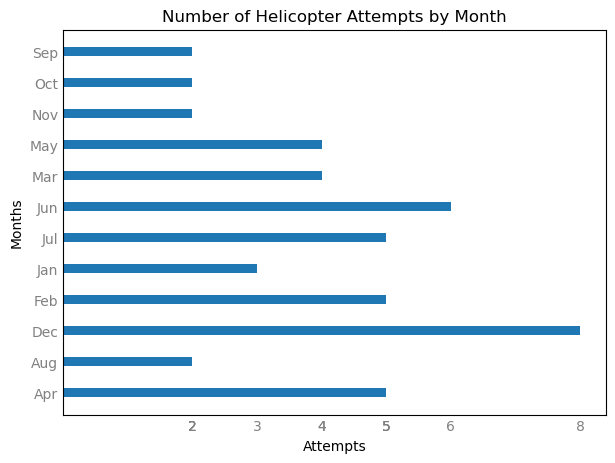

In [260]:
df_month_attempt = pd.DataFrame(data_org,columns = ["Date", "Prison name", "Country", "Succeeded", "Escapee(s)","Details"])

# Convert the Date column to a datetime format and extract the month
#df_month_attempt['Month'] = pd.to_datetime(df_month_attempt['Date']).dt.month
df_month_attempt['MonthName'] = pd.to_datetime(df_month_attempt['Date']).dt.strftime('%b')

freq_table = df_month_attempt.groupby('MonthName').size()

# Sort the table by month in ascending order
freq_table = freq_table.sort_index()

# Convert month values to string to exclude empty month from the plot
months = freq_table.index.astype(str)

# Get the values of the frequency table
attempts = freq_table.values

# Create a horizontal bar plot
plt.figure(figsize=(7, 5))
plt.barh(months, attempts, height = 0.3)
plt.title("Number of Helicopter Attempts by Month")
plt.xlabel("Attempts")
plt.ylabel("Months")

# Style the plot
plt.xticks(attempts, color='grey')
plt.yticks(months, color='grey')
plt.tick_params(axis='both', which='both', length=0)
plt.show()


From the plot, it is clear that December has the highest attempts record compared to the other months.

## Conclusion:

We analyzed the data related to helicopter prison escapes taken from the "List of Helicopter Prison Escapes" on Wikipedia, and the following are the observations:

- The most helicopter prison break attempts occurred in 1986,2001,2007 & 2009
- France has the most prison escapes of 15 attempts followed by United States and Canada.
- Out of 15 attempts, 11 was successful in France and out of 8,6 escapees succeeded in escaping in United States followed by   Canada with 3 attempts succeeded out of 4 attempts.
- Michel Vaujour, Pascal Payet, Vassilis Paleokostas had the audacity to escape twice from prison
- Highest number of break attempts happened in December